# There's a function for that!*
### Let's take a look at some of the wonderful functions provided in `hex_maze_utils.py`!
*If there isn't and you want one, bother me about it or write one and submit a pull request!

In [1]:
import pickle
import pandas as pd
import sys
sys.path.append("..")  # Use sys to add the parent directory (where hex_maze_utils lives) to the path

from hex_maze_utils import plot_hex_maze

### First load our databases so we have some good mazes to play with

In [2]:
# Load the maze configuration database as "maze_database"
maze_database = pd.read_pickle('../maze_configuration_database.pkl')
print(f"Here's our database of {len(maze_database)} hex mazes:")
display(maze_database.head())

# Load a dabatase of some potential barrier sequences as "barrier_sequence_database"
barrier_sequence_database = pd.read_pickle('../Barrier_Sequence_Databases/barrier_sequence_database.pkl')
print(f"Here's our database of {len(barrier_sequence_database)} barrier sequences:")
display(barrier_sequence_database.head())

Here's our database of 55896 hex mazes:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(37, 39, 7, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1,[],0,"{(37, 8, 9, 40, 20, 21, 22, 27, 28), (34, 8, 4..."
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1,[],0,"{(34, 37, 8, 40, 10, 15, 18, 20, 26), (34, 35,..."
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,..."
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1,[],0,"{(34, 37, 8, 40, 13, 46, 15, 18, 25), (34, 37,..."
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [12, 15, 19, 24, 20...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ..."


Here's our database of 3126 barrier sequences:


,barrier_sequence,sequence_length,barrier_changes,reward_path_lengths,choice_points
18,"[(39, 7, 10, 42, 18, 20, 23, 26, 30), (37, 39,...",4,"[[26, 37], [10, 17], [20, 24]]","[[25, 19, 17], [15, 19, 19], [25, 17, 19], [17...","[{29}, {17, 26, 29}, {29}, {26}]"
34,"[(34, 36, 37, 7, 45, 14, 17, 20, 28), (34, 36,...",6,"[[17, 25], [36, 26], [26, 41], [41, 32], [34, ...","[[23, 19, 17], [15, 19, 23], [21, 19, 15], [15...","[{35}, {13}, {35}, {26, 35, 13}, {35, 36, 13},..."
45,"[(32, 34, 11, 44, 13, 46, 15, 21, 30), (32, 34...",5,"[[13, 16], [16, 10], [30, 20], [20, 36]]","[[21, 15, 19], [17, 25, 19], [19, 15, 19], [19...","[{24}, {31}, {16, 24, 31}, {31}, {16}]"
46,"[(37, 7, 42, 44, 14, 20, 25, 28, 31), (37, 7, ...",5,"[[31, 17], [17, 16], [16, 30], [37, 21]]","[[15, 17, 21], [23, 17, 17], [15, 19, 17], [15...","[{13}, {29}, {26}, {26, 13, 29}, {29}]"
60,"[(34, 37, 10, 45, 14, 15, 24, 25, 27), (34, 37...",4,"[[24, 39], [39, 28], [27, 36]]","[[19, 21, 15], [19, 15, 17], [19, 17, 15], [17...","[{36}, {16, 24, 36}, {16, 35, 36}, {16}]"


# Rotating and reflecting a hex maze
So you have a barrier configuration, but it's not quite right. What if it were rotated 120 degrees? Or perhaps flipped across one of its axes of symmetry? 

This could be mildly annoying to do by hand, but never fear! There's a function for that!

In [3]:
from hex_maze_utils import get_rotated_barriers, get_reflected_barriers

# Look at the documentation for our rotation and reflection functions
help(get_rotated_barriers)
help(get_reflected_barriers)

Help on function get_rotated_barriers in module hex_maze_utils:

get_rotated_barriers(original_barriers, direction='counterclockwise')
    Given a set of barriers in the hex maze, returns the corresponding
    barrier set if the maze is rotated once counterclockwise (e.g. hex 1 becomes hex 2,
    4 becomes 49, etc.). Option to specify direction='clockwise' to rotate clockwise
    instead (e.g 1 becomes 3, 4 becomes 48, etc.)

    Args:
    original_barriers (set/frozenset): A set of barriers defining a hex maze
    direction (String): Which direction to rotate the maze ('clockwise' or 'counterclockwise')
    Defaults to 'counterclockwise'

    Returns:
    set: The barrier set if the maze was rotated once in the specified direction

Help on function get_reflected_barriers in module hex_maze_utils:

get_reflected_barriers(original_barriers, axis=1)
    Given a set of barriers in the hex maze, returns the corresponding
    barrier set if the maze is reflected along the axis of hex 1
    

Our starting maze is: {37, 39, 7, 41, 14, 46, 20, 23, 30}. It looks like this:


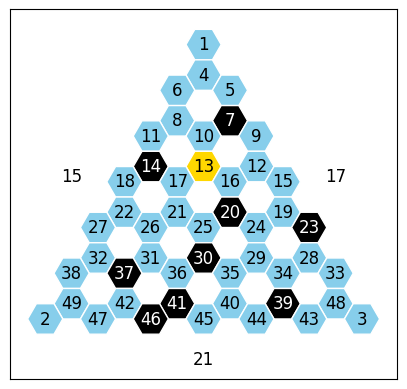

In [4]:
# Start with an example hex maze
example_maze = {37, 39, 7, 41, 14, 46, 20, 23, 30}

# Plot the example maze
print(f"Our starting maze is: {example_maze}. It looks like this:")
plot_hex_maze(example_maze, show_stats=True)

Here is our maze rotated 120 degrees counterclockwise: {32, 34, 7, 41, 11, 19, 20, 21, 23}


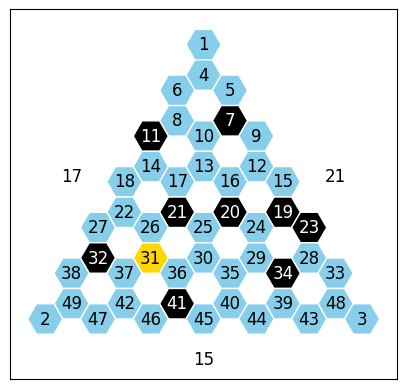

Here is our maze rotated 120 degrees clockwise: {32, 39, 10, 11, 14, 46, 19, 21, 30}


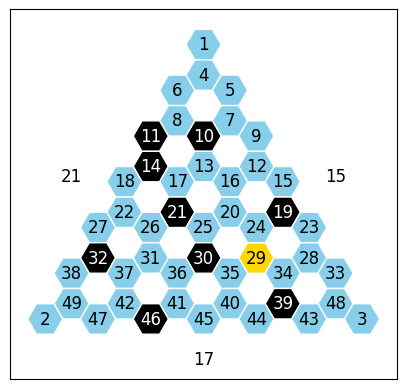

Here is our maze reflected across the axis of hex 1: {34, 8, 40, 42, 12, 44, 21, 27, 30}


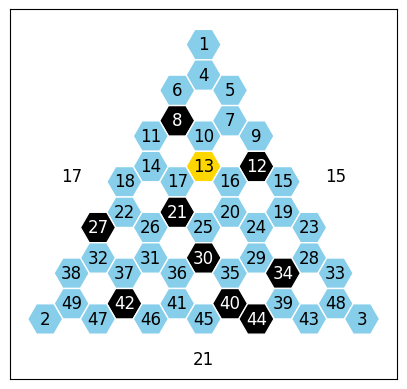

Here is our maze reflected across the axis of hex 2: {37, 8, 40, 9, 20, 21, 22, 27, 28}


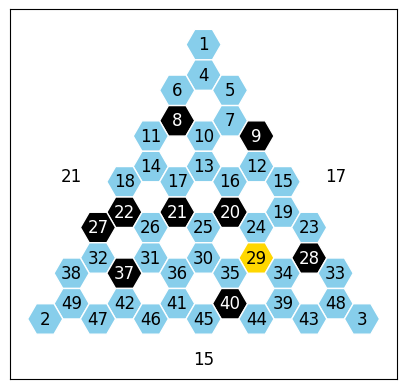

Here is our maze reflected across the axis of hex 3: {9, 10, 42, 12, 44, 20, 22, 28, 30}


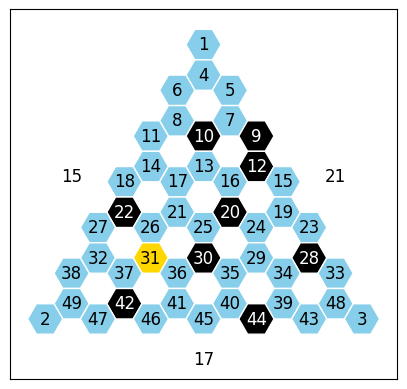

In [5]:
# Rotate the maze counterclockwise
rotated_maze_ccw = get_rotated_barriers(example_maze, direction='counterclockwise')
print(f"Here is our maze rotated 120 degrees counterclockwise: {rotated_maze_ccw}")
plot_hex_maze(rotated_maze_ccw, show_stats=True)

# Rotate the maze clockwise
rotated_maze_cw = get_rotated_barriers(example_maze, direction='clockwise')
print(f"Here is our maze rotated 120 degrees clockwise: {rotated_maze_cw}")
plot_hex_maze(rotated_maze_cw, show_stats=True)

# Reflect the maze across the axis of hex 1
reflected_maze_1 = get_reflected_barriers(example_maze, axis=1)
print(f"Here is our maze reflected across the axis of hex 1: {reflected_maze_1}")
plot_hex_maze(reflected_maze_1, show_stats=True)

# Reflect the maze across the axis of hex 2
reflected_maze_2 = get_reflected_barriers(example_maze, axis=2)
print(f"Here is our maze reflected across the axis of hex 2: {reflected_maze_2}")
plot_hex_maze(reflected_maze_2, show_stats=True)

# Reflect the maze across the axis of hex 3
reflected_maze_3 = get_reflected_barriers(example_maze, axis=3)
print(f"Here is our maze reflected across the axis of hex 3: {reflected_maze_3}")
plot_hex_maze(reflected_maze_3, show_stats=True)

### Getting all rotations and reflections
The set of all rotated and/or reflected mazes for a given maze are known as mazes that are *isomorphic* to that maze. Instead of doing all possible rotations and reflections individually, we have a function to get all of them at once.

In [6]:
from hex_maze_utils import get_isomorphic_mazes

# View the documentation for this function
help(get_isomorphic_mazes)

Help on function get_isomorphic_mazes in module hex_maze_utils:

get_isomorphic_mazes(maze)
    Given a set of barriers defining a hex maze configuration, return the
    other 5 mazes that have the same graph structure (corresponding
    to the maze rotated clockwise/counterclockwise and reflected across its
    3 axes of symmetry)

    Args:
    maze (set/frozenset): A set of barriers defining a hex maze

    Returns:
    set of frozensets: a set of the 5 barrier sets defining mazes isomorphic
    to this maze



In [7]:
# Start with an example hex maze
example_maze = {37, 39, 7, 41, 14, 46, 20, 23, 30}

# Get all mazes isomorphic to this maze
isomorphic_mazes = get_isomorphic_mazes(example_maze)
print(f"Our starting maze is: \n{example_maze}")
print("Here are the mazes isomorphic to this maze:")
print(*(maze for maze in isomorphic_mazes), sep='\n')

Our starting maze is: 
{37, 39, 7, 41, 14, 46, 20, 23, 30}
Here are the mazes isomorphic to this maze:
frozenset({37, 8, 40, 9, 20, 21, 22, 27, 28})
frozenset({32, 34, 7, 41, 11, 19, 20, 21, 23})
frozenset({34, 8, 40, 42, 12, 44, 21, 27, 30})
frozenset({32, 39, 10, 11, 14, 46, 19, 21, 30})
frozenset({9, 10, 42, 12, 44, 20, 22, 28, 30})


# Getting information about a hex maze

We have 2 options:
1. We can use the database to look up information about a hex maze
2. We can calculate information about a hex maze directly

## Using the database to look up info about a hex maze
If our hex maze exists in the database, a database lookup may be faster than recalculating info about the maze (although this only really becomes relevant if we're doing it many times). We can filter the database using the barrier set or use `df_lookup` to look up a specific attribute.

In [8]:
# Import our function for df lookup
from hex_maze_utils import df_lookup

# View the documentation for this function
help(df_lookup)

Help on function df_lookup in module hex_maze_utils:

df_lookup(df, barriers, attribute_name)
    Use the dataframe to look up a specified attribute of a barrier set.

    Args:
    df (DataFrame): The hex maze database
    barriers (set/frozenset): A set of barriers defining a hex maze
    attribute_name (String): The maze attribute to look up in the df.
    Must exist as a column in the df

    Returns:
    The value of the attribute for this maze, or None if the maze isn't in the df



In [9]:
# Example hex maze
example_maze = {32, 36, 8, 9, 41, 44, 21, 23, 24}

# Use the database to look up the choice points for this maze
choice_points = df_lookup(maze_database, example_maze, 'choice_points')
print(f"The choice points for this maze are {choice_points}.")

# Use the database to look up the other mazes isomorphic to this maze
isomorphic_mazes = df_lookup(maze_database, example_maze, 'isomorphic_mazes')
print(f"\nThe isomorphic mazes for this maze are: \n{isomorphic_mazes}.")

# Get the row in the database that has all of the info for this maze
maze_info = maze_database[maze_database['barriers'] == example_maze]
print("\nHere is all of the info for this maze in our database:")
display(maze_info)

The choice points for this maze are {13}.

The isomorphic mazes for this maze are: 
{frozenset({32, 35, 8, 12, 44, 46, 16, np.int64(21), 23}), frozenset({39, 9, 42, 11, 17, 19, 24, 27, 30}), frozenset({36, 7, 44, 46, 14, 17, 20, 27, 28}), frozenset({35, 7, 40, 11, 46, 20, 26, 27, 28}), frozenset({39, 9, 42, 11, 16, 22, 23, 26, 30})}.

Here is all of the info for this maze in our database:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
5,"(32, 36, 8, 9, 41, 44, 21, 23, 24)",17,17,23,"[17, 17, 23]",6,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, ...","[[2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 1...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, ...",{13},1,"[[28, 33, 48, 43, 39, 34]]",1,"{(32, 35, 8, 12, 44, 46, 16, 21, 23), (39, 9, ..."


## Calculating information about a maze
If our hex maze isn't in the database, we can use `get_maze_attributes` to calculate a bunch of relevant information about it!

In [10]:
from hex_maze_utils import get_maze_attributes

# View the documentation for this function
help(get_maze_attributes)

Help on function get_maze_attributes in module hex_maze_utils:

get_maze_attributes(barrier_set)
    Given a set of barriers defining a maze, create a dictionary of attributes for that maze.
    Includes the length of the optimal paths between reward ports, the optimal paths
    between these ports, ther path length difference between optimal paths,
    critical choice points, the number of cycles and the hexes defining these cycles,
    and a set of other maze configurations isomorphic to this maze.

    Args:
    barrier_set (set/frozenset): A set of barriers defining a hex maze

    Returns:
    dict: A dictionary of attributes of this maze



In [11]:
# Example hex maze
example_maze = {32, 36, 8, 9, 41, 44, 21, 23, 24}

# Calculate and print info about this maze
maze_info = get_maze_attributes(example_maze)
for key in maze_info:
    print(f"{key}: {maze_info[key]}")

barriers: {32, 36, 8, 9, 41, 44, 21, 23, 24}
len12: 17
len13: 17
len23: 23
reward_path_lengths: [17, 17, 23]
path_length_difference: 6
optimal_paths_12: [[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, 37, 42, 47, 49, 2]]
optimal_paths_13: [[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3]]
optimal_paths_23: [[2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3]]
optimal_paths_all: [[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 26, 31, 37, 42, 47, 49, 2], [1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3], [2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 28, 33, 48, 3], [2, 49, 47, 42, 37, 31, 26, 22, 18, 14, 17, 13, 16, 20, 25, 30, 35, 29, 34, 39, 43, 48, 3]]
choice_points: {13}
num_choice

# Comparing hex mazes
When comparing mazes or evaluating barrier change sequences, it's nice to have a metric for comparing how similar two maze configurations are. We can do this visually by plotting the mazes and also numerically by counting the hexes different on optimal paths.

## Plotting mazes for comparison
We can use `plot_hex_maze_comparison` to print comparison info and highlight the hexes different on optimal paths between 2 mazes! See the [`Plotting_Hex_Mazes.ipynb`](Plotting_Hex_Mazes.ipynb) tutorial notebook for more info and more plot options for comparing mazes. (This plot function is included here as an illustration of how we count "different" hexes)

Hexes on optimal paths in the first maze but not the second: {36, 14, 17, 18, 22, 26, 30, 31}
Hexes on optimal paths in the second maze but not the first: {13, 14, 16, 17, 18, 20, 22, 24, 26, 29}
There are 13 hexes different on optimal paths between the 2 mazes.


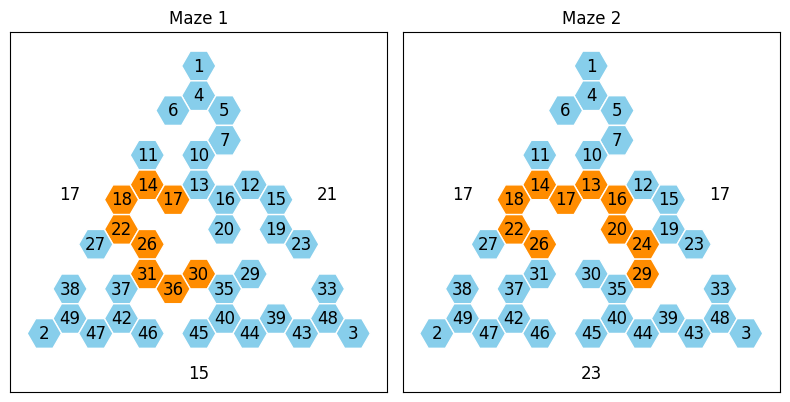

In [12]:
from hex_maze_utils import plot_hex_maze_comparison

# Grab a barrier sequence from the database
barrier_sequence = barrier_sequence_database['barrier_sequence'].iloc[22]

# Take the first two mazes in the sequence to compare
maze1 = barrier_sequence[0]
maze2 = barrier_sequence[1]

# Plot the mazes for comparison
plot_hex_maze_comparison(maze1, maze2)

Let's take a closer look at this count - we count each different hex that a rat must run through on an optimal path between reward ports exactly once. For example, given the following:

`Hexes on optimal paths in the first maze but not the second: {36, 14, 17, 18, 22, 26, 30, 31}.`

`Hexes on optimal paths in the second maze but not the first: {13, 14, 16, 17, 18, 20, 22, 24, 26, 29}`

This results in a count of `13` hexes different on optimal paths. 

Note that the same hex (e.g. hex 14) may appear on both lists. This is because in maze 1, hex 14 exists on the optimal path between port 1 and port 3, but not on the optimal path between ports 2 and 3. In maze 2, hex 14 exists on the optimal path between ports 2 and 3, but not on the optimal path between ports 1 and 3. 

We choose not to count 14 twice even though it appears on both lists. Our count of 13 reflects the size of the combined sets - `{26, 22, 18, 14, 17, 13, 16, 20, 24, 29, 31, 36, 30}`.

## Getting hexes different on optimal paths
Sometimes we don't want to have to plot things, and we just want the hexes (or number of hexes) different on optimal paths.

To do this, we can use `hexes_different_on_optimal_paths` to get the set of hexes on optimal paths in maze1 but not maze2, and the set of hexes on optimal paths in maze2 but not maze1.

We can also use `num_hexes_different_on_optimal_paths` to get the number of hexes different on optimal paths between ports for maze1 and maze2 (equal to the size of the combined sets returned by `hexes_different_on_optimal_paths`).

In [13]:
from hex_maze_utils import hexes_different_on_optimal_paths, num_hexes_different_on_optimal_paths

# Grab a barrier sequence from the database
barrier_sequence = barrier_sequence_database['barrier_sequence'].iloc[22]

# Take the first two mazes in the sequence to compare
maze1 = barrier_sequence[0]
maze2 = barrier_sequence[1]

# Get the hexes different on optimal paths between these 2 mazes
hexes_maze1_not_maze2, hexes_maze2_not_maze1 = hexes_different_on_optimal_paths(maze1, maze2)

# Print the different hexes
print(f"Hexes on optimal paths in the first maze but not the second: {hexes_maze1_not_maze2}")
print(f"Hexes on optimal paths in the second maze but not the first: {hexes_maze2_not_maze1}")

# Get the combined number of hexes different on optimal paths
hex_diff = num_hexes_different_on_optimal_paths(maze1, maze2)

# Print the number of different hexes
print(f"There are {hex_diff} hexes different on optimal paths between the 2 mazes.")

print("\nNote that these numbers match those shown by the comparison plot in the previous cell.")

Hexes on optimal paths in the first maze but not the second: {36, 14, 17, 18, 22, 26, 30, 31}
Hexes on optimal paths in the second maze but not the first: {13, 14, 16, 17, 18, 20, 22, 24, 26, 29}
There are 13 hexes different on optimal paths between the 2 mazes.

Note that these numbers match those shown by the comparison plot in the previous cell.


## Comparing hex mazes (including isomorphic mazes)
When evaluating how different 2 mazes are, it can also be helpful to compare to isomorphic versions of the maze.

Two mazes may appear to be very different, but they may be very similar to a rotated or reflected version of each other.

We can use `num_hexes_different_on_optimal_paths_isomorphic` to get the minimum number of hexes different on optimal paths between ports for maze1 and maze2 (when considering all isomorphic versions of these mazes). To consider rotations only, add the optional argument `type=rotation`. To consider reflections/flips only, add the optional argument `type=reflection` or `type=flip`.

This function also returns the isomporhic version of maze1 that makes it most similar to maze2.

There are 23 hexes different on optimal paths between the original 2 mazes.

Here is a comparison plot confirming the number of hexes different between the 2 mazes:

Hexes on optimal paths in the first maze but not the second: {13, 16, 20, 24, 28, 29, 31, 33, 34, 35, 36, 37, 40, 41, 45}
Hexes on optimal paths in the second maze but not the first: {13, 16, 17, 20, 21, 22, 24, 26, 27, 35, 39, 40, 43, 44}
There are 23 hexes different on optimal paths between the 2 mazes.


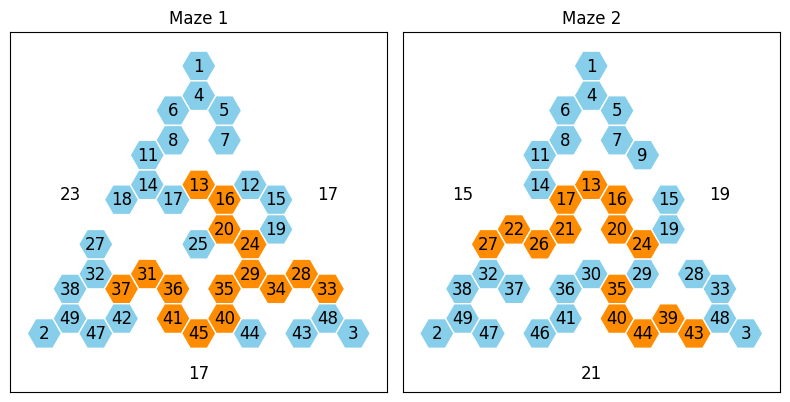



Now let's consider isomorphic comparisons!
There are 14 hexes different on optimal paths between the 2 mazes (including isomorphic comparisons).

Here is a plot showing the differences between the most similar version of maze1 and maze2.
Note that maze1 has been rotated once counterclockwise and then reflected across the axis of hex 1.

Hexes on optimal paths in the first maze but not the second: {5, 37, 7, 10, 13, 14, 18, 31}
Hexes on optimal paths in the second maze but not the first: {6, 8, 11, 14, 17, 21, 27}
There are 14 hexes different on optimal paths between the 2 mazes.


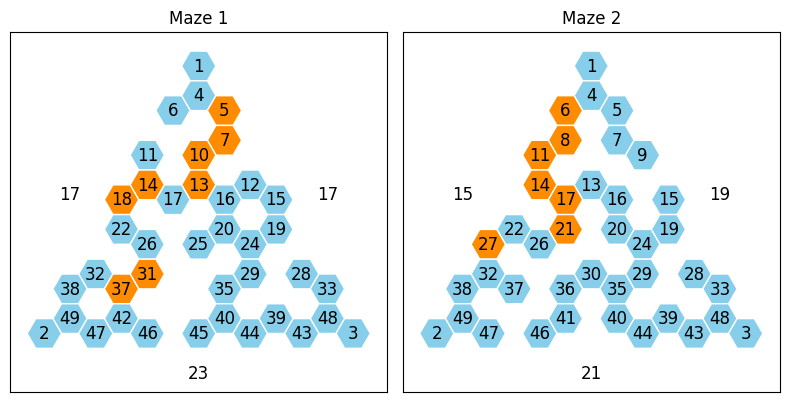

In [14]:
from hex_maze_utils import num_hexes_different_on_optimal_paths, num_hexes_different_on_optimal_paths_isomorphic, plot_hex_maze_comparison

# Here are 2 example mazes to compare
maze1 = {39, 9, 10, 46, 21, 22, 23, 26, 30}
maze2 = {34, 10, 42, 12, 45, 18, 23, 25, 31}

# Print the combined number of hexes different on optimal paths (between the original 2 mazes)
hex_diff = num_hexes_different_on_optimal_paths(maze1, maze2)
print(f"There are {hex_diff} hexes different on optimal paths between the original 2 mazes.")

# Confirm with the plot
print("\nHere is a comparison plot confirming the number of hexes different between the 2 mazes:\n")
plot_hex_maze_comparison(maze1, maze2)

# Now get the combined number of hexes different on optimal paths (including isomorphic comparisons)
print("\n\nNow let's consider isomorphic comparisons!")
hex_diff_iso, most_similar_maze = num_hexes_different_on_optimal_paths_isomorphic(maze1, maze2)
print(f"There are {hex_diff_iso} hexes different on optimal paths between the 2 mazes (including isomorphic comparisons).")

# Confirm with the plot
print("\nHere is a plot showing the differences between the most similar version of maze1 and maze2.")
print("Note that maze1 has been rotated once counterclockwise and then reflected across the axis of hex 1.\n")
plot_hex_maze_comparison(most_similar_maze, maze2)